In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import time, datetime

### Задание 8.12.1

In [ ]:
ds = pd.read_csv('./data/gold_clean.csv')
ds = ds.rename(columns = {'ts': 'unixtime'})
ds['ts'] = pd.to_datetime(ds.unixtime)
ds = ds[(ds.ts >= '2018-01-10') & (ds.ts <= '2018-01-11')]

fig = go.Figure(data  = [go.Candlestick(
            x=ds['ts'],
            open  = ds['open'],
            high  = ds['high'],
            low   = ds['low'],
            close = ds['close']
        )])

fig.show()

ds = ds.reset_index(drop=True)
ds.head()

In [ ]:
data = ds.copy()
# Вычисление скользящего среднего с окном в 100 для колонки с ценами закрытия
data['rolling_mean'] = data['close'].rolling(window=100).mean()

# Нахождение момента, когда значение скользящего среднего впервые оказывается меньше значения close
first_crossing_index = data[data['rolling_mean'] < data['close']].index[0]

# Вывод значения скользящего среднего в этот момент
value_at_first_crossing = round(data.loc[first_crossing_index, 'rolling_mean'], 1)
print("Значение скользящего среднего впервые стало меньше значения close в момент:", value_at_first_crossing)


### Задание 8.12.2

In [ ]:
# Вычисление скользящего квадратического отклонения с окном в 100 для колонки с ценами закрытия
data['rolling_std'] = data['close'].rolling(window=100).std()

# Нахождение индекса момента, когда значение скользящего квадратического отклонения впервые становится не NaN
first_non_nan_index = data['rolling_std'].first_valid_index()

# Вывод значения скользящего квадратического отклонения в этот момент
value_at_first_non_nan = round(data.loc[first_non_nan_index, 'rolling_std'], 4)
print("Значение скользящего квадратического отклонения впервые становится не NaN в момент:", value_at_first_non_nan)


### Задание 8.12.3

In [ ]:
# Вычисление скользящего среднего и скользящего стандартного отклонения с окном в 100 для колонки с ценами закрытия
rolling_mean = data['close'].rolling(window=100).mean()
rolling_std = data['close'].rolling(window=100).std()

# Вычисление верхней и нижней линий Боллинджера
upper_bollinger = rolling_mean + 3 * rolling_std
lower_bollinger = rolling_mean - 3 * rolling_std

# Подсчет количества точек колонки close, лежащих выше верхней линии Боллинджера
points_above_upper_bollinger = data[data['close'] > upper_bollinger].shape[0]

print("Количество точек колонки close, лежащих выше верхней линии Боллинджера:", points_above_upper_bollinger)

In [ ]:
# Подсчет количества точек колонки close, лежащих ниже нижней линии Боллинджера
points_below_lower_bollinger = data[data['close'] < lower_bollinger].shape[0]

print("Количество точек колонки close, лежащих ниже нижней линии Боллинджера:", points_below_lower_bollinger)

### Задание 8.12.4

In [ ]:
def custom_rolling_function(data, window):
    rolling_result = []
    for i in range(len(data)):
        if i >= window - 1:
            window_data = data[i - window + 1:i + 1]
            min_value = min(window_data)
            max_value = max(window_data)
            rolling_result.append((min_value + max_value) / 2)
        else:
            rolling_result.append(None)  # Для первых window - 1 значений нет данных
    return rolling_result

# Применяем свою скользящую функцию к колонке с ценами закрытия
data['custom_rolling_mean'] = custom_rolling_function(data['close'], window=50)

# Получаем последнее значение полученной функции
last_custom_rolling_mean = data['custom_rolling_mean'].iloc[-1]

print("Последнее значение скользящей функции:", last_custom_rolling_mean)

### Задание 8.12.5 

In [ ]:
mov_avg = data.close.rolling(window=500).mean()
mov_exp_avg = data.close.ewm(span=100).mean()
data['dif'] = np.sign(mov_avg - mov_exp_avg).diff()
data.dropna()[data.dif != 0]

### Задание 8.17.1

In [9]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import time, datetime
from scipy import signal
from scipy.fft import fft

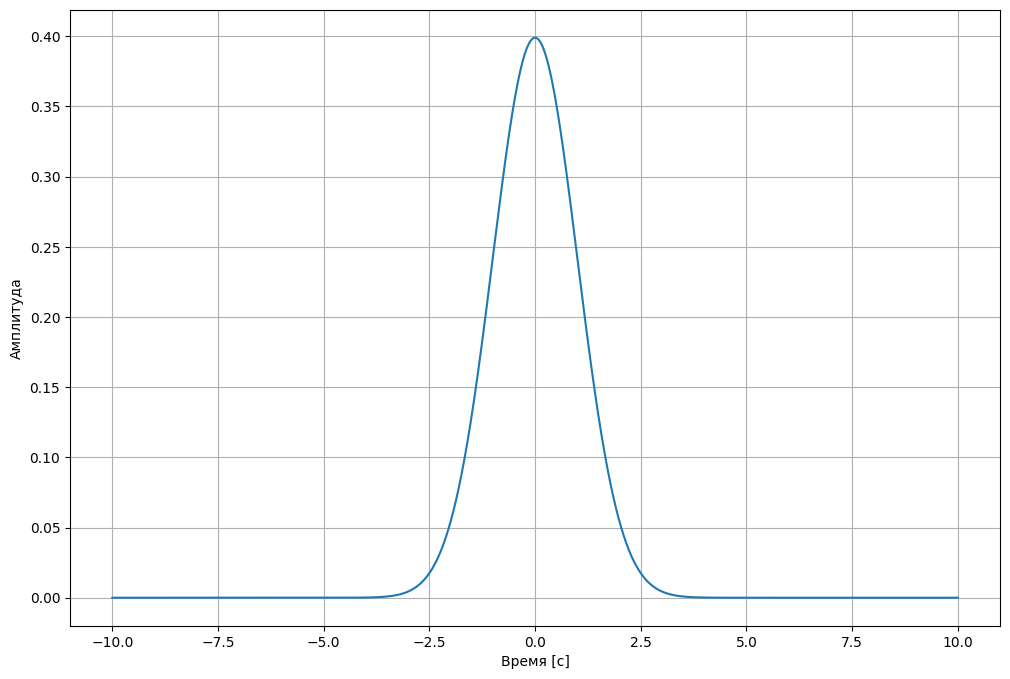

In [21]:
a1 = np.sqrt(1/2/np.pi) 
a2 = 1
Fs = 1000 
Ts = 1.0/Fs 
t0 = 0

df = pd.DataFrame()
df['t'] = np.arange(-10, 10, Ts)
## функция Гаусса
df['y'] = a1 * np.exp(-(df.t-t0)**2/2/a2)

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(df.t, df.y)
ax.set_xlabel('Время [c]')
ax.set_ylabel('Амплитуда')
ax.grid()

amplitude: 0.1


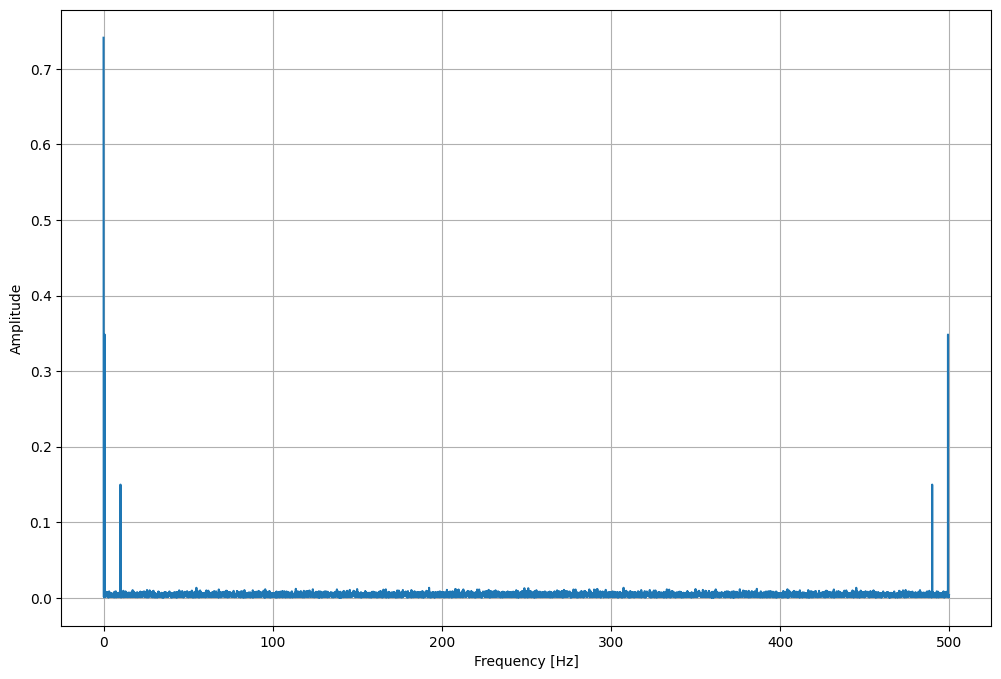

In [24]:
N = len(df)
## создаём сетку частот
frq = np.fft.fftfreq(N, Ts)
## нас интересуют только положительные частоты (отрицательные частоты симметричны) 
frq = frq[range(int(N/2))]

## делаем преобразование Фурье
Y = 2/N * np.fft.fft(df.y)
Y = Y[range(int(N/2))]

print("amplitude:", round(np.abs(Y[0]), 1))

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(frq, 2.0 / N * np.abs(yf[:N//2]))
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude')
ax.grid()

plt.show()

### Задание 8.17.2

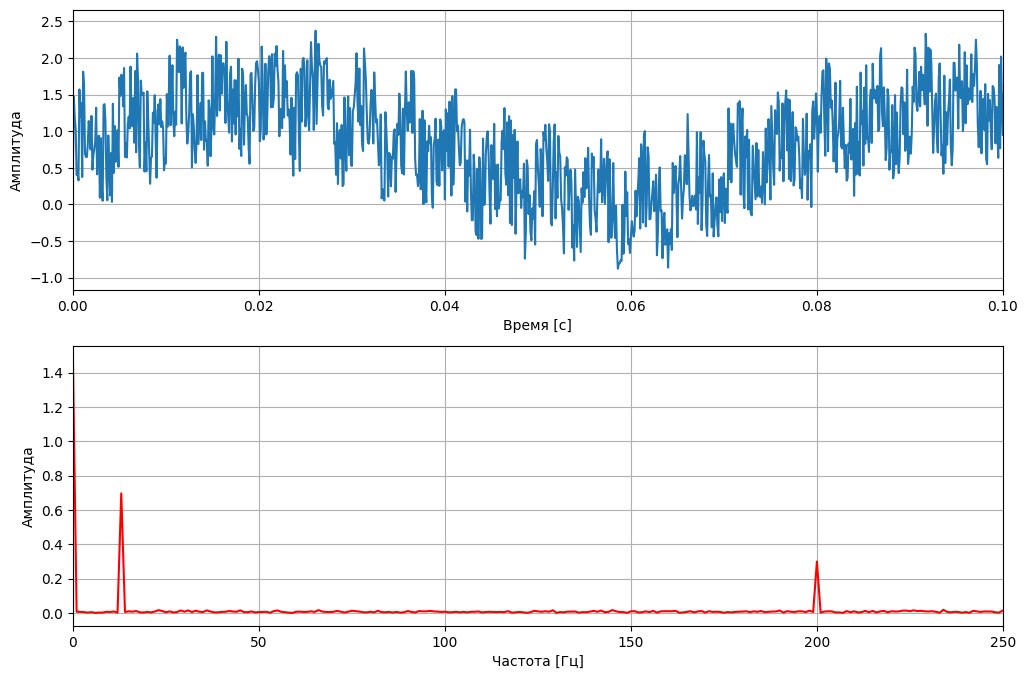

In [44]:
w1 = 13   ## частота первого синуса
w2 = 200  ## частота второго синуса
a1 = 0.7  ## амплитуда первого синуса
a2 = 0.3  ## амплитуда второго синуса
a3 = 1.5  ## амплитуда шума
Fs = 10000  ## частота дискретизации: 10 кГц
Ts = 1.0/Fs ## интервал времени между соседними точками

np.random.seed(42)

df = pd.DataFrame()
## ось времени
df['t'] = np.arange(0, 1, Ts)
## cигнал
df['y'] = a1*np.sin(2*np.pi*w1*df.t) + a2*np.sin(2*np.pi*w2*df.t) + a3*np.random.random(len(df))

N = len(df)
## создаём сетку частот
frq = np.fft.fftfreq(N, Ts)
## нас интересуют только положительные частоты (отрицательные частоты симметричны) 
frq = frq[range(int(N/2))]

## делаем преобразование Фурье
Y = 2/N * np.fft.fft(df.y)
## нас интересуют только положительные частоты (отрицательные частоты симметричны) 
Y = Y[range(int(N/2))]

## визуализируем
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].plot(df.t, df.y)
ax[0].set_xlim([0, 0.1])
ax[0].set_xlabel('Время [c]')
ax[0].set_ylabel('Амплитуда')
ax[0].grid()

ax[1].plot(frq, abs(Y), 'r') 
ax[1].set_xlabel('Частота [Гц]')
ax[1].set_ylabel('Амплитуда')
ax[1].set_xlim([0, 250])
ax[1].grid()

-3.58482731435907


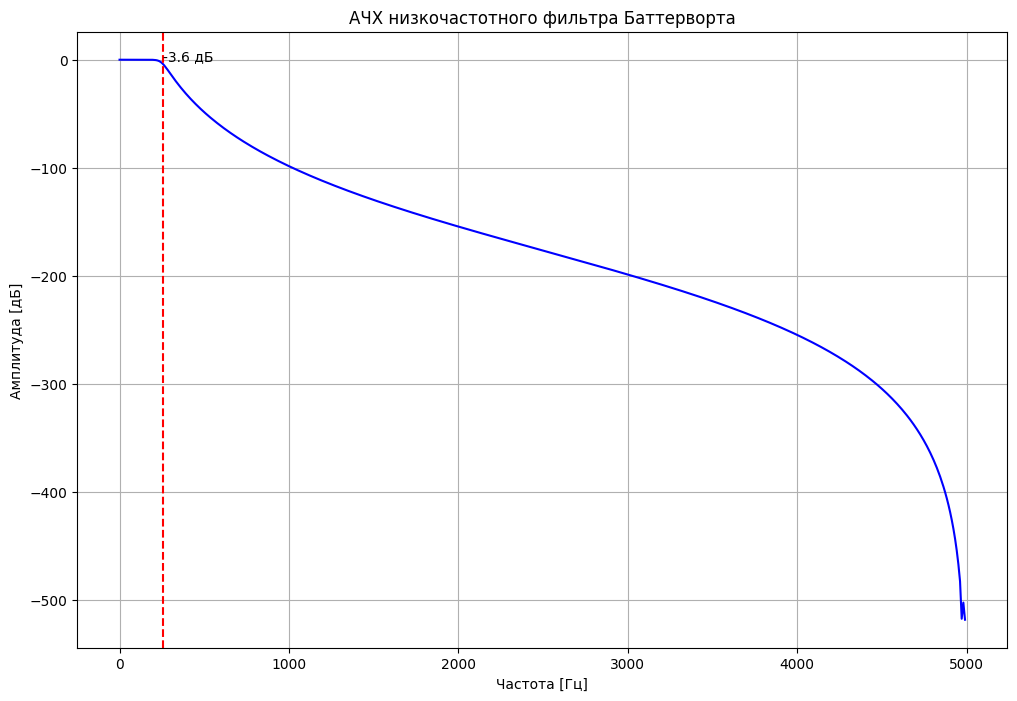

In [45]:
# Создаем фильтр Баттерворта
b, a = signal.butter(8, 250, fs=Fs)

# Получаем частотно-амплитудную характеристику (АЧХ)
w, h = signal.freqz(b, a)
w = Fs / np.pi / 2 * w

# Определяем значение ослабления сигнала в дБ на частоте 254 Гц
freq_index = np.abs(w-254).argmin()
amplituda = 20 * np.log10(abs(h))
attenuation_db = amplituda[freq_index]
print(attenuation_db)

# Визуализация
plt.figure(figsize=(12, 8))
plt.plot(w, amplituda, 'b')
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда [дБ]')
plt.title('АЧХ низкочастотного фильтра Баттерворта')
plt.grid()

# Отображение значения ослабления сигнала в дБ на частоте 254 Гц
plt.axvline(x=254, color='r', linestyle='--')
plt.text(254, attenuation_db, f'{round(attenuation_db, 1)} дБ', va='bottom')

plt.show()

### Задание 8.17.3

In [46]:
df['y_filt'] = signal.filtfilt(b, a, df.y)
mean_filtered_value = np.mean(np.abs(df['y_filt']))
print(round(mean_filtered_value, 3))

0.767


### Задание 8.17.4 ???

-40.80294586731761


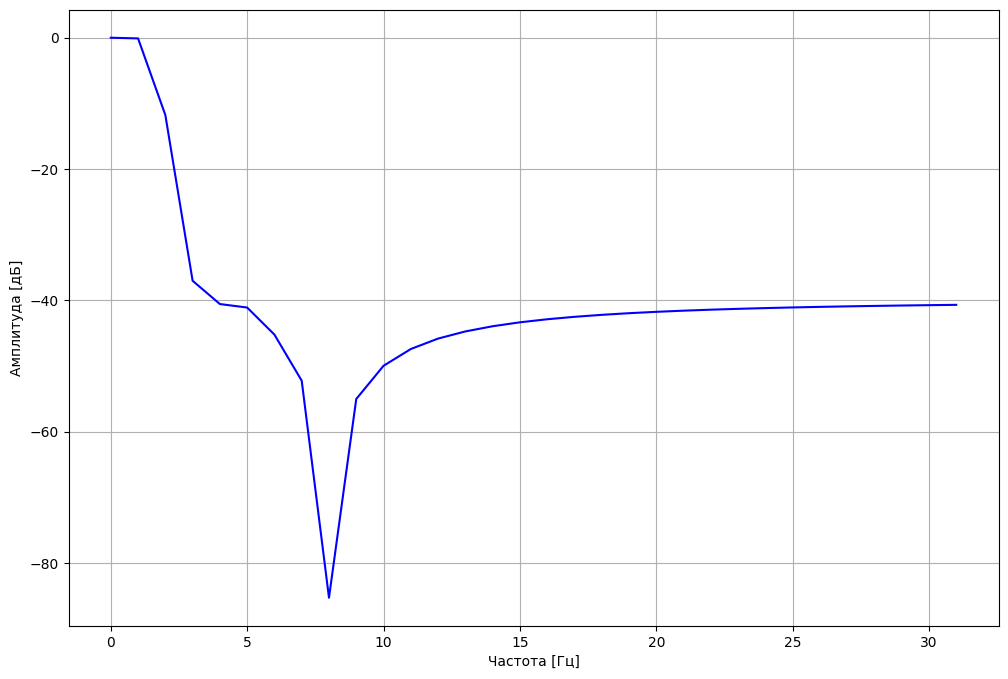

In [56]:
# Создаем высокочастотный фильтр Чебышёва второго рода
b, a = signal.cheby2(N=4, rs=40, Wn=30, fs=Fs)

# Определяем значение подавления сигнала на частоте 29 Гц
w, h = signal.freqz(b, a, fs=Fs)
w = Fs / np.pi / 2 * w

amplituda = 20 * np.log10(abs(h))
print(amplituda[29])

plt.figure(figsize=(12, 8))
plt.plot(frq[:32], amplituda[:32], 'b')
plt.xlabel('Частота [Гц]')
plt.ylabel('Амплитуда [дБ]')
plt.grid()

### Задание 8.17.5

In [57]:
# Создание высокочастотного фильтра Чебышёва второго рода
b, a = signal.cheby2(N=4, rs=40, Wn=30, btype='high', fs=Fs)
df['y_filt'] = signal.lfilter(b, a, df['y'])

# Вычисление среднего значения модуля отфильтрованной функции
mean_filtered_value = np.mean(np.abs(df['y_filt']))

# Вывод результата с округлением до одного знака после запятой
print(round(mean_filtered_value, 1))

0.4


### Задание 8.19.1

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters, EfficientFCParameters, MinimalFCParameters

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from math import isnan

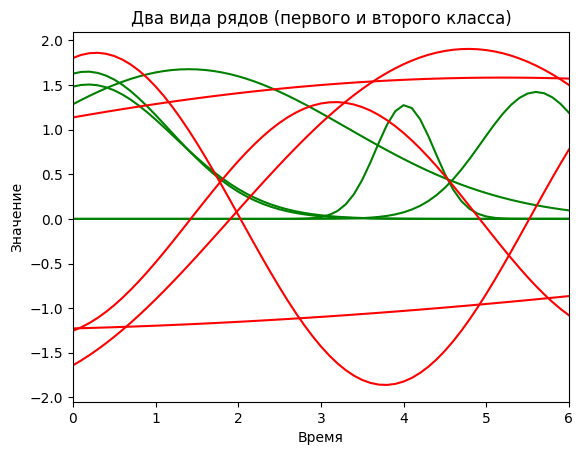

data.shape = (12200, 4)
data.id.nunique() = 200


,t,y,label,id
0,0.0,1.957849,1,0
1,0.1,1.957849,1,0
2,0.2,1.957849,1,0


In [59]:
N = 100 ## количество семплов каждого класса
Nvis = 5 ## сколько семплов будем визуализировать
timePoints = 61  ## количество элементов в каждом из рядов

df = pd.DataFrame()
data = pd.DataFrame()
t = np.linspace(0, 6, timePoints) 

random.seed(42)

## генерируем семплы первого класса
for i in range(N):
    t0 = 2*np.pi*random.random()
    a1 = 5*random.random()
    A = 1 + random.random()        
    
    df['t']  = t                   ## ось времени
    df['y']  = A*np.exp(-(df.t-t0)**2/2/a1)  ## значения временного ряда
    df['label'] = 1                ## класс временного ряда 
    df['id'] = i                   ## номер временного ряда
    
    data = pd.concat([data, df], ignore_index=True)         ## добавляем семпл в общий дейтафрейм
    if i < Nvis:                   ## визуализируем первые Nvis-штук
        plt.plot(df.t, df.y, color='g') 
    
## генерируем семплы второго класса    
for i in range(N, 2*N):
    A = 1 + random.random()          ## амплитуда
    w = 0 + random.random()          ## частота
    ph = 2*np.pi * random.random()   ## фаза
    
    df['t']  = t                     ## ось времени
    df['y']  = A*np.sin(t*w + ph)    ## значения временного ряда
    df['label'] = 0                  ## класс временного ряда 
    df['id'] = i                     ## номер временного ряда
    
    data = pd.concat([data, df], ignore_index=True)           ## добавляем семпл в общий дейтафрейм
    if i < Nvis+N:                   ## визуализируем первые Nvis-штук
        plt.plot(df.t, df.y, color='r') 
    
## cдвигаем все значения вверх, чтобы все значения были положительными    
data['y'] = data.y + np.abs(data.y.min())
    
plt.xlabel("Время")
plt.ylabel("Значение")
plt.title('Два вида рядов (первого и второго класса)')
plt.xlim([t[0], t[-1]])
plt.show()

print('data.shape =', data.shape)
print('data.id.nunique() =', data.id.nunique())
data.head(3)

In [66]:
stats = data.groupby('id')['y'].agg(['max', 'min', 'mean', 'median'])

# Round the values to two decimal places
stats = stats.round(2)

print("Statistics for time series with id = 3:")
print(stats.loc[3])

Statistics for time series with id = 3:
max       3.46
min       1.96
mean      2.34
median    2.00
Name: 3, dtype: float64


### Задание 8.19.2

In [68]:
def featuresTSFresh(data):    
    extraction_settings = \
    {
        "maximum": None,
        "minimum": None,
        "mean": None,
        "median": None     
    }

    ## извлечение фич из данных    
    featuresDF = extract_features(
        data, 
        column_id='id',  ## номер временного ряда
        column_sort='t', ## ось времени
        default_fc_parameters=extraction_settings, ## список фич, которые хотим извлечь
        impute_function=impute                     ## заменить все inf и NaN
    )
    return featuresDF.reset_index()

## убираем колонку class из данных (мы не хотим из неё извлекать фичи)
features = featuresTSFresh(data.drop('label', axis=1))

## помечаем ряды (добавляем обратно первый и второй класс)
features['label'] = 0
features['label'].iloc[N:] = 1

print('data.shape =', data.shape)
print('features.shape =', features.shape)
features.head(3)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 40.01it/s]

data.shape = (12200, 4)
features.shape = (200, 6)



C:\Users\pavlu\AppData\Local\Temp\ipykernel_157492\3433161712.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['label'].iloc[N:] = 1


,index,y__maximum,y__minimum,y__mean,y__median,label
0,0,3.231294,1.957849,2.143130,1.957977,0
1,1,3.634548,2.052910,2.972939,3.143508,0
2,2,3.379718,1.957849,2.246776,1.958426,0


trainSet.shape = (120, 7)
testSet.shape  = (80, 7)

Value counts train: label
0    60
1    60
Name: count, dtype: int64
Value counts test: label
0    40
1    40
Name: count, dtype: int64


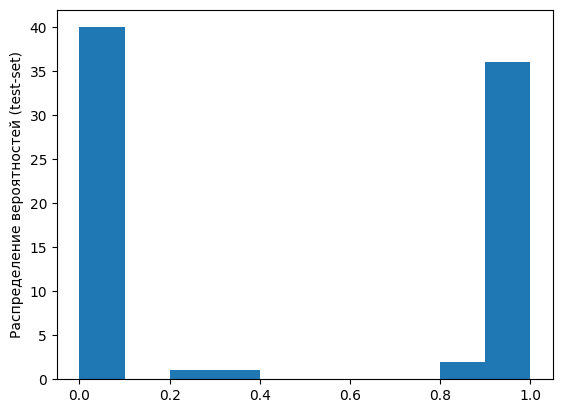

              features  importances
2           y__minimum     0.979625
1           y__maximum     0.019480
4            y__median     0.000476
0  y__count_below_mean     0.000418
3              y__mean     0.000000

   Pos  Neg
0   40    0
1    2   38
AUC = 1.000  Точность = 0.975


In [77]:
trainSet, testSet = train_test_split(features, test_size=0.4, random_state=42) 

## выводим статистику по нашим наборам
print('trainSet.shape =', trainSet.shape)
print('testSet.shape  =', testSet.shape)
print()
print('Value counts train:', trainSet.label.value_counts())
print('Value counts test:', testSet.label.value_counts())

## лист фич
featureList = trainSet.drop(['index', 'label'], axis=1).columns

## параметры классификатора
params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2, 'max_features' : 1.0, 'class_weight' : 'balanced',
         'random_state': 42}

## обучаем классификатор
clf = RandomForestClassifier(**params).fit(trainSet[featureList], trainSet['label'])

## делаем предсказание на тестовом наборе
y_pred = clf.predict(testSet[featureList])
y_pred_proba = clf.predict_proba(testSet[featureList])[:, 1]  ## вероятности

## визуализируем вероятности для предсказаний
plt.hist(y_pred_proba)
plt.ylabel('Распределение вероятностей (test-set)')
plt.show()
## создадим для удобства дейтафрейм с результатами
res = testSet
res['pred'] = y_pred 
res['pred_proba'] = y_pred_proba

## получаем из классификатора важность фич и отображаем их
ftmprt = pd.DataFrame()
ftmprt['features'] = featureList
ftmprt['importances'] = clf.feature_importances_
ftmprt = ftmprt.sort_values('importances', ascending=
False)
print(ftmprt.head(20))
print()
proba = res.pred_proba

## считаем матрицу ошибок
CM = confusion_matrix(res['label'], res['pred'])
CM_DF = pd.DataFrame(data=CM, columns = ['Pos', 'Neg'])
print(CM_DF)

# ROC-AUC 
FPR, TPR, thresholds = roc_curve(res['label'], res['pred_proba'])
roc_auc = auc(FPR, TPR)
acc = res[res['pred'] == res['label']].shape[0] / res.shape[0] ## точность
print(f"AUC = {roc_auc:.3f}  Точность = {acc:.3f}")

### Задание 8.19.3

In [76]:
def featuresTSFresh(data):    
    extraction_settings = \
    {
        "count_below_mean": None,
        "maximum": None,
        "minimum": None,
        "mean": None,
        "median": None     
    }

    ## извлечение фич из данных    
    featuresDF = extract_features(
        data, 
        column_id='id',  ## номер временного ряда
        column_sort='t', ## ось времени
        default_fc_parameters=extraction_settings, ## список фич, которые хотим извлечь
        impute_function=impute                     ## заменить все inf и NaN
    )
    return featuresDF.reset_index()

## убираем колонку class из данных (мы не хотим из неё извлекать фичи)
features = featuresTSFresh(data.drop('label', axis=1))

## помечаем ряды (добавляем обратно первый и второй класс)
features['label'] = 0
features['label'].iloc[N:] = 1

print('data.shape =', data.shape)
print('features.shape =', features.shape)
features.head(5)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 41.85it/s]

data.shape = (12200, 4)
features.shape = (200, 7)



C:\Users\pavlu\AppData\Local\Temp\ipykernel_157492\1704581743.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['label'].iloc[N:] = 1


,index,y__count_below_mean,y__maximum,y__minimum,y__mean,y__median,label
0,0,47.0,3.231294,1.957849,2.143130,1.957977,0
1,1,27.0,3.634548,2.052910,2.972939,3.143508,0
2,2,45.0,3.379718,1.957849,2.246776,1.958426,0
3,3,41.0,3.463092,1.957850,2.339297,1.998222,0
4,4,42.0,3.606816,1.957850,2.354036,1.986966,0


### Задание 8.21.1

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.decomposition import NMF

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from math import isnan

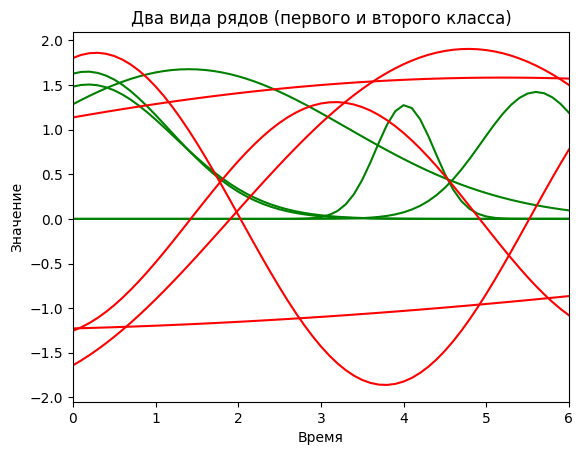

data.shape = (12200, 4)
data.id.nunique() = 200


,t,y,label,id
0,0.0,1.957849,1,0
1,0.1,1.957849,1,0
2,0.2,1.957849,1,0


In [121]:
N = 100 ## количество семплов каждого класса
Nvis = 5 ## сколько семплов будем визуализировать
timePoints = 61  ## количество элементов в каждом из рядов

df = pd.DataFrame()
data = pd.DataFrame()
t = np.linspace(0, 6, timePoints) 

random.seed(42)

## генерируем семплы первого класса
for i in range(N):
    t0 = 2*np.pi*random.random()
    a1 = 5*random.random()
    A = 1 + random.random()        
    
    df['t']  = t                   ## ось времени
    df['y']  = A*np.exp(-(df.t-t0)**2/2/a1)  ## значения временного ряда
    df['label'] = 1                ## класс временного ряда 
    df['id'] = i                   ## номер временного ряда
    
    data = pd.concat([data, df])         ## добавляем семпл в общий дейтафрейм
    if i < Nvis:                   ## визуализируем первые Nvis-штук
        plt.plot(df.t, df.y, color='g') 
    
## генерируем семплы второго класса    
for i in range(N, 2*N):
    A = 1 + random.random()          ## амплитуда
    w = 0 + random.random()          ## частота
    ph = 2*np.pi * random.random()   ## фаза
    
    df['t']  = t                     ## ось времени
    df['y']  = A*np.sin(t*w + ph)    ## значения временного ряда
    df['label'] = 0                  ## класс временного ряда 
    df['id'] = i                     ## номер временного ряда
    
    data = pd.concat([data, df])           ## добавляем семпл в общий дейтафрейм
    if i < Nvis+N:                   ## визуализируем первые Nvis-штук
        plt.plot(df.t, df.y, color='r') 
    
## cдвигаем все значения вверх, чтобы все значения были положительными    
data['y'] = data.y + np.abs(data.y.min())
    
plt.xlabel("Время")
plt.ylabel("Значение")
plt.title('Два вида рядов (первого и второго класса)')
plt.xlim([t[0], t[-1]])
plt.show()

print('data.shape =', data.shape)
print('data.id.nunique() =', data.id.nunique())
data.head(3)

In [123]:
dataPivoted = data.pivot(index='id', columns='t', values='y')
dataPivoted = dataPivoted.reset_index(drop=True)
dataPivoted['label'] = 0
dataPivoted['label'].iloc[N:] = 1

value_08 = dataPivoted.loc[dataPivoted.index[0], 0.8]
print("Value in column '0.8' in the first row:", value_08)

print('dataPivoted.shape =', dataPivoted.shape)
dataPivoted.head(3)

Value in column '0.8' in the first row: 1.9578494756366658
dataPivoted.shape = (200, 62)


C:\Users\pavlu\AppData\Local\Temp\ipykernel_157492\1354202651.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataPivoted['label'].iloc[N:] = 1


t,0.0,0.1,0.2,0.30000000000000004,0.4,0.5,0.6000000000000001,0.7000000000000001,0.8,0.9,...,5.2,5.300000000000001,5.4,5.5,5.6000000000000005,5.7,5.800000000000001,5.9,6.0,label
0,1.957849,1.957849,1.957849,1.957849,1.957849,1.957849,1.957849,1.957849,1.957849,1.957849,...,1.962614,1.959628,1.958462,1.958044,1.957907,1.957865,1.957853,1.957850,1.957850,0
1,3.241556,3.289581,3.335656,3.379460,3.420678,3.459009,3.494166,3.525883,3.553915,3.578042,...,2.194464,2.170989,2.149323,2.129392,2.111119,2.094421,2.079213,2.065405,2.052910,0
2,1.957849,1.957849,1.957849,1.957849,1.957849,1.957849,1.957849,1.957849,1.957849,1.957849,...,3.134488,3.234827,3.312206,3.361605,3.379718,3.365310,3.319365,3.244966,3.146961,0


### Задание 8.21.2 ???

In [120]:
train, test = train_test_split(dataPivoted, test_size=0.4, random_state=43) 
print('train.shape =', train.shape)
print('test.shape  =', test.shape)

train.shape = (36,)
test.shape  = (25,)


In [119]:
dataPivoted = dataPivoted.drop('label', axis=1).columns

X_train, X_test = train_test_split(dataPivoted, test_size=0.4, random_state=43) 
print('train.shape =', X_train.shape)
print('test.shape  =', X_test.shape)

nmf = NMF(n_components=3, init='nndsvd', random_state=0, tol=0.001, max_iter=5000, solver='cd')
W_train = nmf.fit_transform(X_train)
W_test = nmf.transform(X_test)
H = nmf.components_

# Access the value H[0][0] with two decimal places
value_H_00 = round(H[0][0], 2)
print("Value of H[0][0]:", value_H_00)


train.shape = (36,)
test.shape  = (25,)


ValueError: Expected 2D array, got 1D array instead:
array=[0.8 1.5 2.  0.7 3.3 2.8 3.8 3.9 0.9 1.  3.2 2.4 1.2 3.6 6.  4.7 5.2 5.5
 3.4 0.1 2.5 1.1 3.5 5.9 2.3 3.  4.6 0.2 2.7 1.7 5.1 1.6 2.1 4.9 0.  0.4].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

### Задание 8.21.3 ???

In [106]:
X_train

,t,y,id
42,4.2,2.758863,54
42,4.2,2.281013,37
4,0.4,1.388501,111
8,0.8,1.747758,111
28,2.8,0.823936,195
...,...,...,...
8,0.8,0.866151,196
6,0.6,1.957849,85
22,2.2,2.391690,88
6,0.6,2.807957,14


In [105]:
ind = 54

print(f'Коэффициенты разложения для {ind}-элемента: {W_train[ind]}')
y = X_train.iloc[ind].values

reconstr

Коэффициенты разложения для 54-элемента: [0.19105583 0.07391383 0.08626715]


array([ 1.70005479,  1.96648534, 18.99997964])

### Задание 8.21.4 (см в уроке M8_21)

### Задание 8.23.1

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from math import isnan

In [127]:
data = pd.read_csv('./data/gold_clean.csv')
data = data.rename(columns = {'ts': 'unixtime'})
data['ts'] = pd.to_datetime(data.unixtime)
data = data[(data.ts >= '2018-02-10') & (data.ts <= '2018-02-22')]

print(f'len(data) = {len(data)}')
data.head()

len(data) = 10792


,unixtime,open,high,low,close,vol,ts
39280,1518220800000000000,1316.7,1317.1,1316.7,1317.0,259,2018-02-10 00:00:00
39281,1518220860000000000,1317.0,1317.0,1316.6,1316.7,103,2018-02-10 00:01:00
39282,1518220920000000000,1316.8,1317.1,1316.7,1317.1,139,2018-02-10 00:02:00
39283,1518220980000000000,1317.0,1317.6,1317.0,1317.5,198,2018-02-10 00:03:00
39284,1518221040000000000,1317.6,1318.3,1317.6,1318.1,218,2018-02-10 00:04:00


In [128]:
data_sorted = data.sort_values(by='ts')

split_index = int(0.6 * len(data_sorted))  # 60% for training, 40% for testing
train_data, test_data = np.split(data_sorted, [split_index])

first_row_test_vol = test_data.iloc[0]['vol']
print(f"Volume of the first row in the testing set: {first_row_test_vol}")


Volume of the first row in the testing set: 934


### Задание 8.23.2

In [129]:
import numpy as np
import pandas as pd

def multiple_split(data, num_splits, train_indices):
    # Split the data into num_splits parts
    data_splits = np.array_split(data, num_splits)
    
    # Select the parts for the training set
    train_data = pd.concat([data_splits[i] for i in train_indices])
    
    # Get the volume of the last row in the training set
    last_row_train_vol = train_data.iloc[-1]['vol']
    
    return train_data, last_row_train_vol

# Perform multiple split
train_data, last_row_train_vol = multiple_split(data_sorted, 5, [0, 1, 2])

print(f"Volume of the last row in the training set: {last_row_train_vol}")


Volume of the last row in the training set: 934


### Задание 8.23.3 ???

In [130]:
import numpy as np
import pandas as pd

def walk_forward_split(data, n_splits, n_train, n_test, fold):
    train_data = []
    test_data = []
    
    # Calculate the total number of samples
    total_samples = len(data)
    
    # Calculate the step size
    step = n_train + n_test
    
    # Calculate the starting index for the fold
    start_index = fold * step
    
    # Iterate through the data
    for i in range(start_index, total_samples, step):
        # Define the indices for the current train-test split
        train_indices = list(range(i - n_train, i))
        test_indices = list(range(i, min(i + n_test, total_samples)))
        
        # Append the train and test data to the lists
        train_data.append(data.iloc[train_indices])
        test_data.append(data.iloc[test_indices])
    
    # Concatenate the train and test data into DataFrames
    train_df = pd.concat(train_data)
    test_df = pd.concat(test_data)
    
    return train_df, test_df

n_splits = 10
n_train = 3
n_test = 1
fold = 1

train_data, test_data = walk_forward_split(data, n_splits, n_train, n_test, fold)

last_unixtime_test = test_data['unixtime'].iloc[-1]

print("Last unixtime value in the test set:", last_unixtime_test)


Last unixtime value in the test set: 1519257420000000000
